# Plot Utility
This notebook provide basic function to plot the results obtained using the study_auto_encoder notebook.

### Plot Setting
The following cell defines the configuration of the plot where lists are used to define the color, label, etc. of all curves.

In [4]:
import numpy as np
import os
import itertools
import csv

import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.text as mtext
import matplotlib.colorbar as clb
import matplotlib.cm as cm

(n,k) = (8,4)

plot_config = {
    'path':f'study-ae-{n}-{k}',                                                                                                                             # Path of the results
    'title':f'Performance of ({n},{k}) Code',                                                                                                                              # Plot title
    'labels': ['GNBP','MLD','BP']*5 + ['BP'] + ['GNBP']*5 + ['MLD'] + ['Uncoded'],                                                                          # Labels of each curves
    'categories': ['AE']*15 + ['Hamming (8,4)']*7 + [' '],                                                                                                  # Legends categories
    'lines':['-']*15 + ['--']*7 + [':'],                                                                                                                    # Type of lines
    'colors':['blue']*15 + ['red']*7 + ['black'],                                                                                                           # Colors
    'markers':['s','','o']*5 + ['o'] + ['s']*5 + ['']*2,                                                                                                    # Types of markers
    'plot': [False,False,False, False,False,False, False,True,False, True,False,False, False,False,False, True, False,False,False,False,False, True, False],# Which curves to plot. If set to [] then all curves are plotted
    'x':'Eb_No',                                                                                                                                            # Plot vs 'Eb_No' or 'SNR',
    'y':'BER',                                                                                                                                              # Plot 'BER' or 'BLER',
    'min_x': 0,                                                                                                                                             # Min x
    'max_x': 6,                                                                                                                                             # Max x
    'min_y': None,                                                                                                                                          # Min y
    'max_y': None,                                                                                                                                          # Max y
    'save':True,                                                                                                                                            # Save plot
    'plot_uncoded_BPSK':True                                                                                                                                # Plot uncoded BPSK reference (need to adjust above arguments accordingly)
}  


### Plot Data

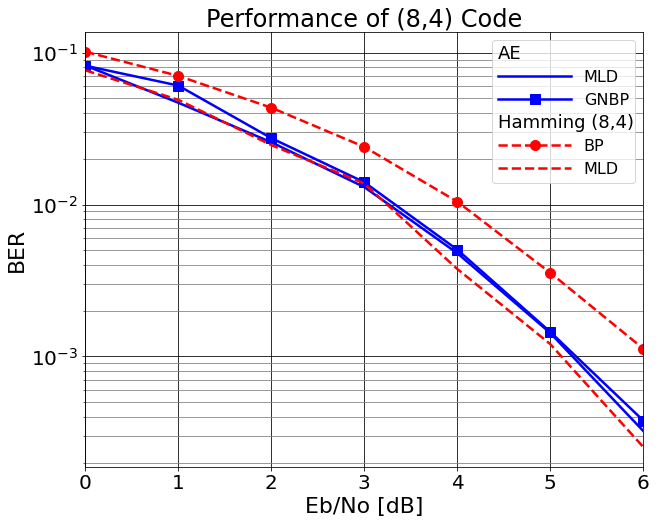

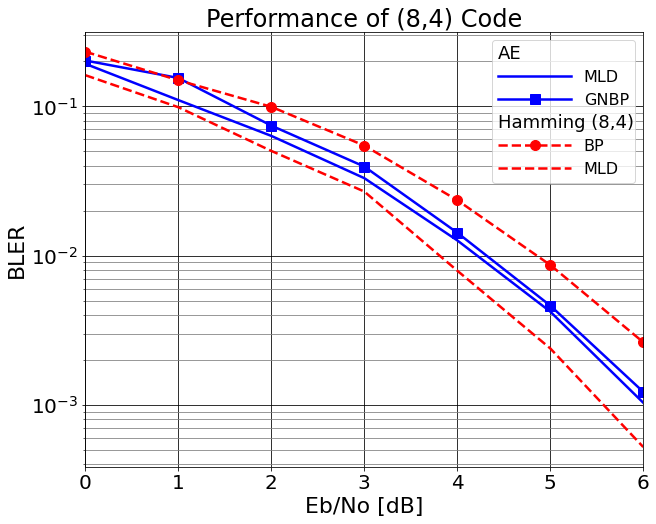

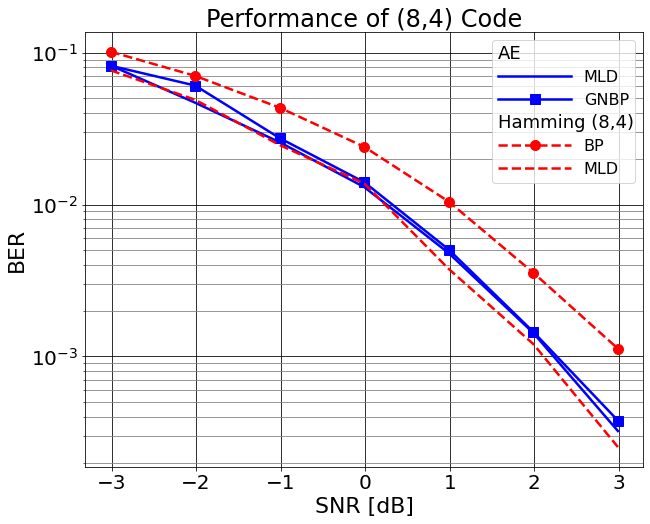

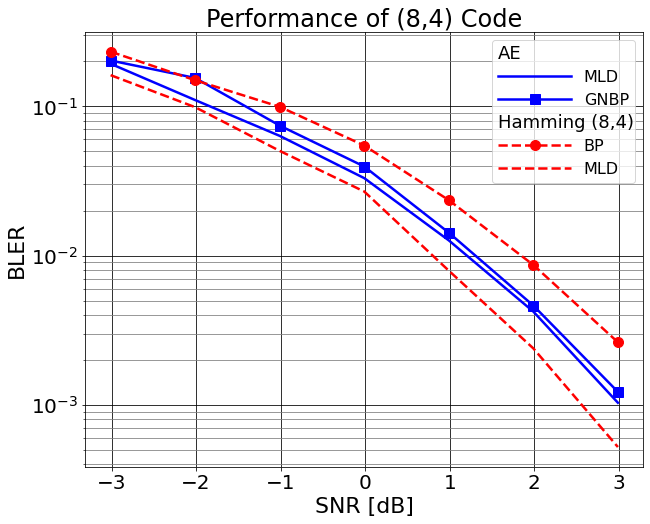

In [5]:
class LegendTitle(object):
    def __init__(self, text_props=None):
        self.text_props = text_props or {}
        super(LegendTitle, self).__init__()

    def legend_artist(self, legend, orig_handle, fontsize, handlebox):
        x0, y0 = handlebox.xdescent, handlebox.ydescent
        title = mtext.Text(x0, y0, orig_handle, usetex=False, **self.text_props)
        handlebox.add_artist(title)
        return title
 
def plot_data(plot_config):   
    data = []
    if plot_config['y'] == 'BLER':
        with open(plot_config['path'] + "/results/summary-bler.csv", newline="") as csvfile:
            csv_reader = csv.reader(csvfile, delimiter=",")
            for row in csv_reader:
                data.append(row)
        y_label = 'BLER'
    else:
        with open(plot_config['path'] + "/results/summary-ber.csv", newline="") as csvfile:
            csv_reader = csv.reader(csvfile, delimiter=",")
            for row in csv_reader:
                data.append(row)
        y_label = 'BER'
                
    data = np.array(data)        

    lines = plot_config['lines']
    if lines == []:
        lines = ["-"]
    markers = plot_config['markers']
    if markers == []:
        markers = ["^", "+", "s", "o", "*", "p", "x", ""]

    colors = plot_config['colors']
    if colors == []:
        colors = ["blue","orange","green","red","purple","brown","olive","black","tab:blue"]

    plots = plot_config['plot']
    if plots == []:
        plots = [True]
        
    lines = itertools.cycle(lines)
    markers = itertools.cycle(markers)
    colors = itertools.cycle(colors)
    plots = itertools.cycle(plots)
    
    labels = plot_config['labels']
    categories = plot_config['categories']

    legend_labels = []
    legend_categories = []
        
    if plot_config['x'] == 'SNR':
        SNR = [float(y) for y in data[1:,1]]
        x_data = SNR
        x_label = 'SNR [dB]'
    else:
        Eb_No = [float(y) for y in data[1:,0]]
        x_data = Eb_No
        x_label = 'Eb/No [dB]'
        
    plt.figure(figsize=(10,8))
    for i,name in enumerate(data[0,2:]):
        y_data = [float(y) for y in data[1:,i+2]]  
        y_data = [y if y != 0 else None for y in y_data]  
        
        line = next(lines)
        marker = next(markers)
        color = next(colors)
        plot = next(plots)
        if labels == []:
            label = name
        else:
            label = labels[i]
        
        if plot:     
            [line] = plt.plot(x_data,y_data,marker=marker,markersize=10,color=color,linestyle=line,linewidth=2.5,label=label)
            
            if categories == []:
                category = None
            else:
                category = categories[i]
                if category not in legend_categories:
                    legend_categories.append(category)
                    legend_categories.append(line)
                    legend_labels.append("")
                    legend_labels.append(label)
                else:
                    legend_categories.append(line)
                    legend_labels.append(label)

    if plot_config['plot_uncoded_BPSK']:
        # Uncoded BPSK REF
        SNR_dB_uncoded_BPSK =    [3.010299956,4.010299956,5.010299956,6.010299956,7.010299956,8.010299956,9.010299956,10.0102999566,11.0102999566,12.0102999566]
        Eb_No_dB_uncoded_BPSK =          [0          ,1         ,2          ,3          ,4          ,5          ,6          ,7            ,8            ,9            ]
        BER_uncoded_BPSK =  [0.077499986,0.063125014,0.037250005,0.021617651,0.012291674,0.005711551,0.002418843,0.00081869116,0.00017563792,3.4400284e-05]
        BLER_uncoded_BPSK = [1 - np.power((1-p_e),k) for p_e in BER_uncoded_BPSK]

        if plot_config['x'] == 'SNR':
            x_data = SNR_dB_uncoded_BPSK
        else:
            x_data = Eb_No_dB_uncoded_BPSK
        if plot_config['y'] == 'BLER':
            y_data = BLER_uncoded_BPSK
        else:
            y_data = BER_uncoded_BPSK   
        
        line = next(lines)
        marker = next(markers)
        color = next(colors)
        plot = next(plots)
        
        if plot:
            if labels == []:
                label = "Uncoded BPSK"
            else:
                label = labels[i+1]
                    
            [line] = plt.plot(x_data,y_data,marker=marker,markersize=10,color=color,linestyle=line,linewidth=2.5,label=label)
            
            if categories == []:
                category = None
            else:
                category = categories[i+1]
                if category not in legend_categories:
                    legend_categories.append(category)
                    legend_categories.append(line)
                    legend_labels.append("")
                    legend_labels.append(label)
                else:
                    legend_categories.append(line)
                    legend_labels.append(label)
            
        
    title_fontsize = 24 
    ax_labels_fontsize = 22
    ticks_fontsize = 20
    legend_categories_fontsize = 18
    legend_labels_fontsize = 16
    
                     
    plt.grid(b=True, which="major", color="black")
    plt.grid(b=True, which="minor", color="grey")
    plt.yscale("log")
    plt.xlabel(x_label, fontsize=ax_labels_fontsize)
    plt.ylabel(y_label, fontsize=ax_labels_fontsize)
    plt.xlim(plot_config['min_x'],plot_config['max_x'])
    plt.ylim(plot_config['min_y'],plot_config['max_y'])
    plt.xticks(fontsize=ticks_fontsize)
    plt.yticks(fontsize=ticks_fontsize)
    plt.title(plot_config['title'], fontsize=title_fontsize)


    if categories == []:
        plt.legend()
    else:
        plt.legend(legend_categories,legend_labels,fontsize=legend_labels_fontsize, handler_map={str: LegendTitle({"fontsize": legend_categories_fontsize})},handlelength=0.35*max([len(txt) for txt in categories]))
        
    if plot_config['save']:
        plt.savefig(
            f"{plot_config['path']}/results/{plot_config['y']}_vs_{plot_config['x']}.png", format="png", dpi=500
        )
            
    plt.show()

plot_config['x'] = 'Eb_No'  
plot_config['y'] = 'BER'  
plot_config['min_x'] = 0
plot_config['max_x'] = 6
plot_data(plot_config)

plot_config['x'] = 'Eb_No'    
plot_config['y'] = 'BLER'  
plot_config['min_x'] = 0
plot_config['max_x'] = 6    
plot_data(plot_config)

plot_config['x'] = 'SNR'    
plot_config['y'] = 'BER'  
plot_config['min_x'] = None
plot_config['max_x'] = None  
plot_data(plot_config)

plot_config['x'] = 'SNR'    
plot_config['y'] = 'BLER'    
plot_config['min_x'] = None
plot_config['max_x'] = None  
plot_data(plot_config)



AE_GNBP_0


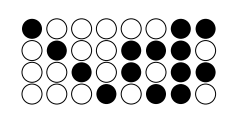

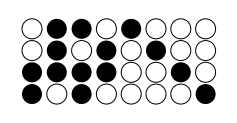

AE_GNBP_0_BP


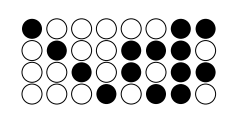

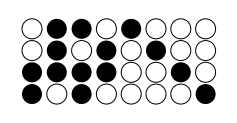

AE_GNBP_0_ML


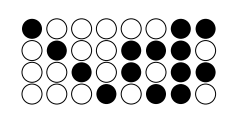

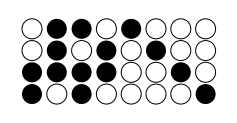

AE_GNBP_1


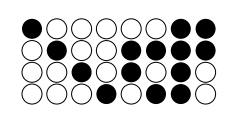

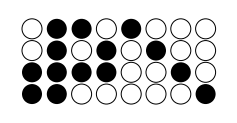

AE_GNBP_1_BP


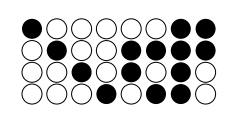

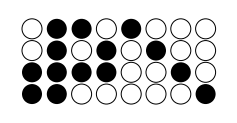

AE_GNBP_1_ML


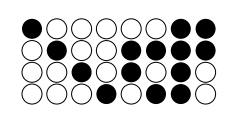

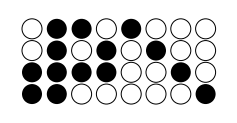

AE_GNBP_2


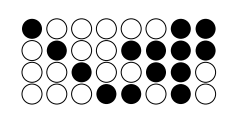

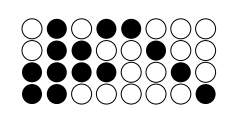

AE_GNBP_2_BP


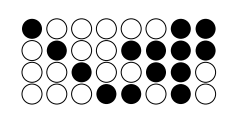

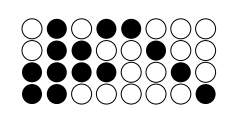

AE_GNBP_2_ML


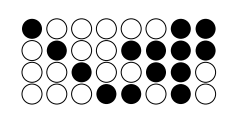

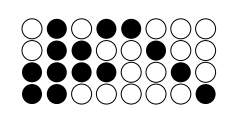

AE_GNBP_3


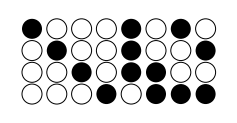

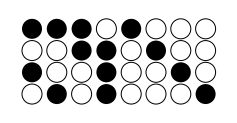

AE_GNBP_3_BP


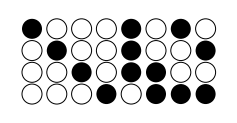

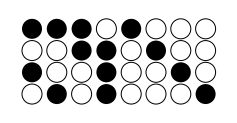

AE_GNBP_3_ML


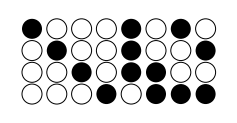

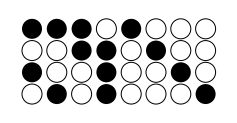

AE_GNBP_4


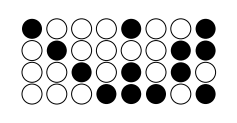

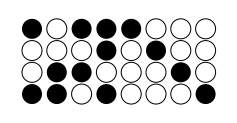

AE_GNBP_4_BP


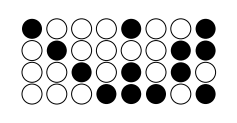

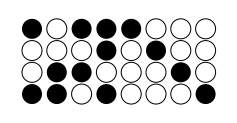

AE_GNBP_4_ML


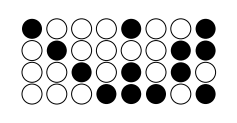

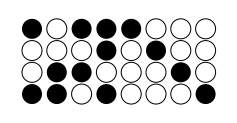

checkpoint
Hamming_BP


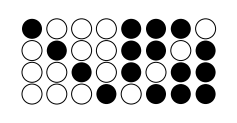

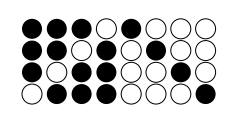

Hamming_GNBP_0


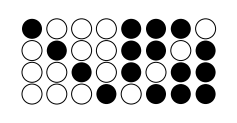

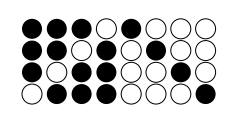

Hamming_GNBP_1


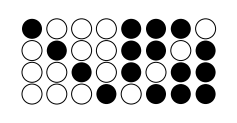

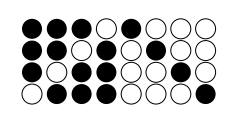

Hamming_GNBP_2


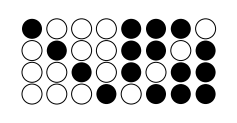

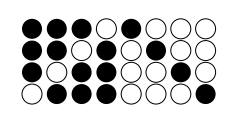

Hamming_GNBP_3


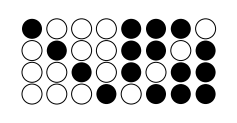

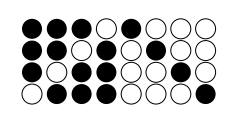

Hamming_GNBP_4


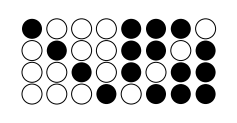

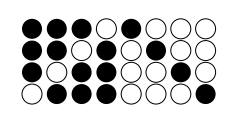

Hamming_ML


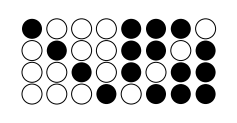

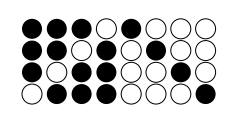

In [6]:
def dot_plot_matrix(M):
    M = np.flip(np.array(M), axis=0)
    width = np.shape(M)[1]
    height = np.shape(M)[0]
    coords = np.argwhere(M == 1)
    not_coords = np.argwhere(M == 0)
    figure = plt.figure(figsize=(width/2,height/2))
    plt.xlim(-1, M.shape[1])
    plt.ylim(-1, M.shape[0])
    plt.scatter(
        coords[:, 1],
        coords[:, 0],
        marker="o",
        facecolors="black",
        edgecolors="none",
        s=400,
    )
    plt.scatter(
        not_coords[:, 1],
        not_coords[:, 0],
        marker="o",
        facecolors="none",
        edgecolors="black",
        s=400,
    )
    plt.axis("off")
    return figure



def plot_models_matrices(plot_config):
    base_path = f"{plot_config['path']}/models"
    models_dirs = os.listdir(base_path)
    for model_dir in models_dirs:
        print(model_dir)
        if model_dir != "checkpoint":
            G = []
            with open(f"{base_path}/{model_dir}/matrices/G.csv", newline="") as csvfile:
                csv_reader = csv.reader(csvfile, delimiter=" ")
                for row in csv_reader:
                    G.append([int(i) for i in row])
            H = []
            with open(f"{base_path}/{model_dir}/matrices/H.csv", newline="") as csvfile:
                csv_reader = csv.reader(csvfile, delimiter=" ")
                for row in csv_reader:
                    H.append([int(i) for i in row])
            G = np.array(G)
            H = np.array(H)
            
            G_plot = dot_plot_matrix(G)#dot_plot_matrix_heatmap(G)
            if plot_config['save']:
                plt.savefig(
                    f"{base_path}/{model_dir}/matrices/G.png", format="png", dpi=500
                )
            plt.show()
                
            H_plot = dot_plot_matrix(H)#dot_plot_matrix_heatmap(H)
            if plot_config['save']:
                plt.savefig(
                    f"{base_path}/{model_dir}/matrices/H.png", format="png", dpi=500
                )
            plt.show()
                   
    
    
    
plot_models_matrices(plot_config)

Copyright (c) 2022 Orange

Author: Guillaume Larue <guillaume.larue@orange.com>

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), 
to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, 
and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice (including the next paragraph) shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS 
FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER 
IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE

